In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [137]:
dfs = pd.read_csv("quitSmokingState.csv.txt")
dfc = pd.read_csv("deathRatesStates.csv.txt")

#22/50 states
states = [0, 1, 2, 8, 11, 13, 14, 15, 16, 17, 19, 20, 23, 25, 27, 34, 35, 38, 39, 40, 41, 42, 44, 46, 47, 48, 50]
remove = []
for i in range(50):
    if((i in states) == False):
        remove.append(i)
dfs_states = dfs.drop(remove, axis = 0)
dfc_states = dfc.drop(remove, axis = 0)

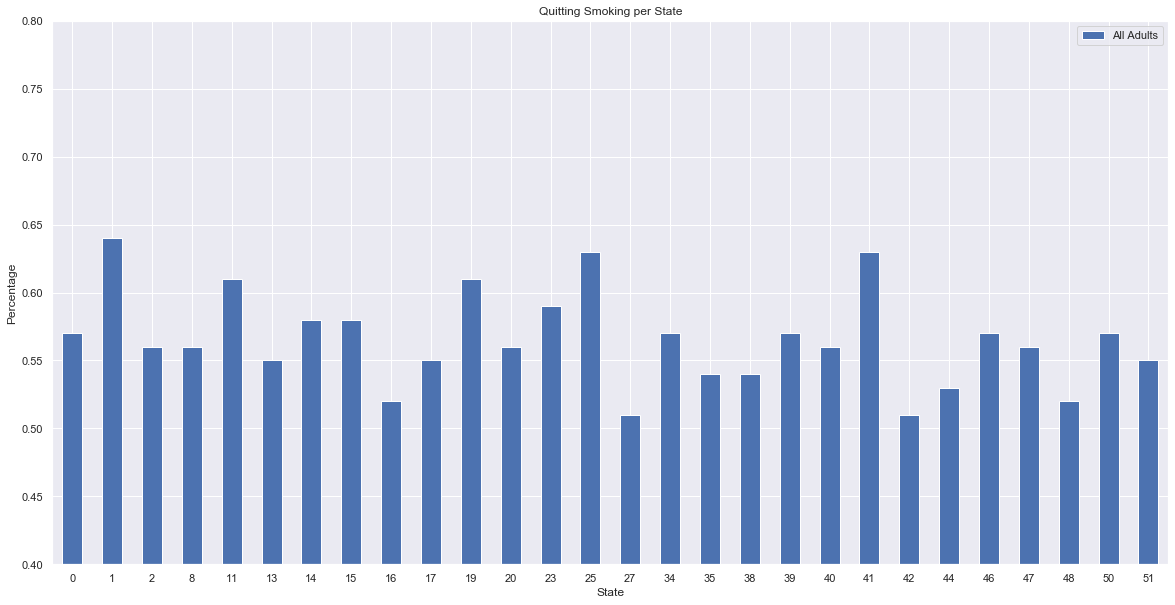

In [138]:
ax = dfs_states.plot.bar(y="All Adults", rot=0, figsize=(20,10), ylim = (0.4, .8))
plt.title("Quitting Smoking per State")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.savefig("figures/QuittingSmokingPerState")

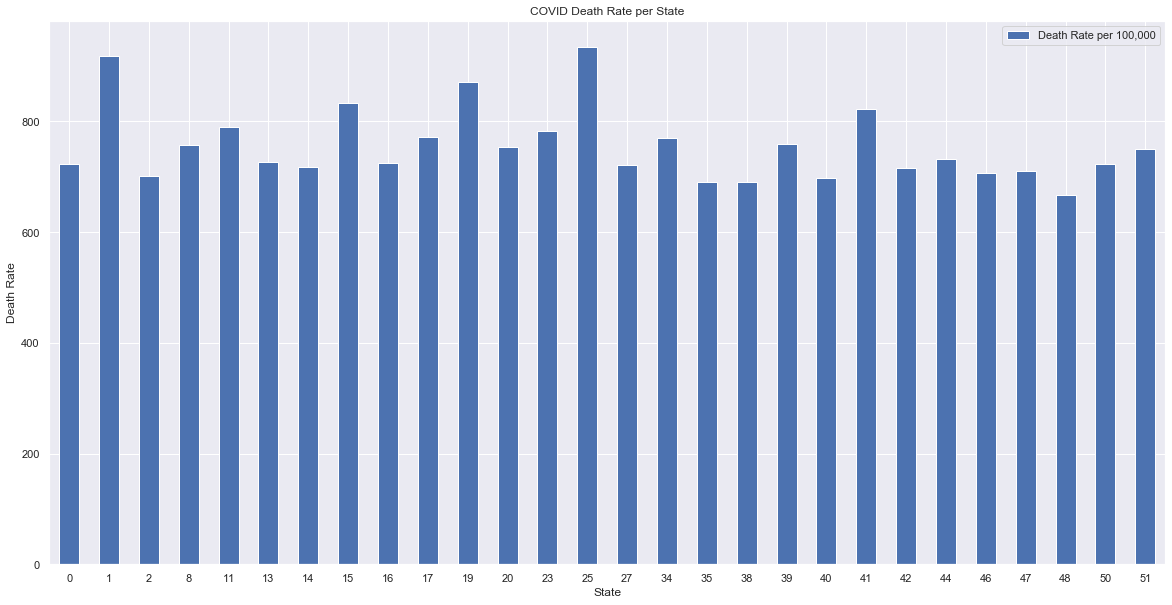

In [139]:
ax = dfc_states.plot.bar(y='Death Rate per 100,000', rot=0, figsize=(20,10))
plt.title("COVID Death Rate per State")
plt.xlabel("State")
plt.ylabel("Death Rate")
plt.savefig("figures/COVIDDeathsPerState")

In [140]:
dfs_states["COVID Death Rate"] = dfc_states["Death Rate per 100,000"]

In [141]:
dfs_states.head()

,Location,All Adults,Non-Hispanic White,Non-Hispanic Black,Hispanic,Asian and Native Hawaiian or Pacific Islander,American Indian/ Alaska Native,Other,Footnotes,COVID Death Rate
0,United States,0.57,0.54,0.69,0.60,0.67,0.51,0.58,1.0,723.6
1,Alabama,0.64,0.63,0.71,NSD,NSD,0.49,0.71,NaN,918.1
2,Alaska,0.56,0.55,0.58,NSD,NSD,0.59,0.64,NaN,700.3
8,Delaware,0.56,0.54,0.63,0.57,0.73,0.61,NSD,NaN,757.2
11,Georgia,0.61,0.56,0.72,0.69,0.71,NSD,0.54,NaN,790.2


In [142]:
dfs_states = dfs_states.drop(columns = ["Non-Hispanic White", "Non-Hispanic Black", "Hispanic", "Asian and Native Hawaiian or Pacific Islander", "American Indian/ Alaska Native", "Other", "Footnotes"])

In [143]:
dfs_states.head()

,Location,All Adults,COVID Death Rate
0,United States,0.57,723.6
1,Alabama,0.64,918.1
2,Alaska,0.56,700.3
8,Delaware,0.56,757.2
11,Georgia,0.61,790.2


In [144]:
dfs_states

,Location,All Adults,COVID Death Rate
0,United States,0.57,723.6
1,Alabama,0.64,918.1
2,Alaska,0.56,700.3
8,Delaware,0.56,757.2
11,Georgia,0.61,790.2
13,Idaho,0.55,726.6
14,Illinois,0.58,716.9
15,Indiana,0.58,832.7
16,Iowa,0.52,723.9
17,Kansas,0.55,771.3


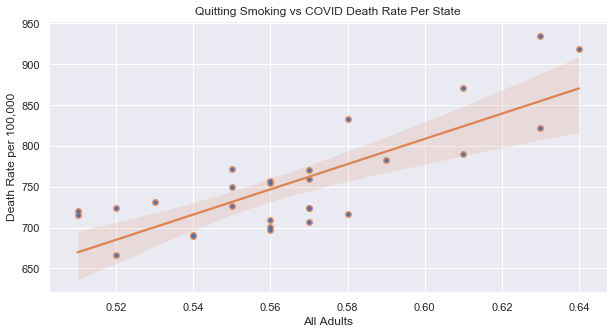

<Figure size 432x288 with 0 Axes>

In [145]:
plt.figure(figsize=(10,5))
plt.plot(dfs_states["All Adults"], dfc_states["Death Rate per 100,000"], ".")
plt.title("Quitting Smoking vs COVID Death Rate Per State")
plt.xlabel("Quitting Smoking Rate")
plt.ylabel("COVID Death Rate")

sns.set(color_codes=True)
ax = sns.regplot(x=dfs_states["All Adults"], y=dfc_states["Death Rate per 100,000"])

plt.show()
plt.savefig("figures/QuittingSmokingvsCOVID")

In [146]:
correlation = dfs_states["All Adults"].corr(dfc_states["Death Rate per 100,000"])
print(correlation)

0.8017732475257475
